# Bernstein Vazirani Algorithm

The Bernstein-Vazirani algorithm can be seen as an extension of the Deutsch-Jozsa algorithm we covered in the last section. It showed that there can be advantages in using a quantum computer as a computational tool for more complex problems than the Deutsch-Jozsa problem.

see [Bernstein-Vazirani Algorithm](https://learn.qiskit.org/course/ch-algorithms/bernstein-vazirani-algorithm)

Code Implementation adapted from [QX06-BernsteinVaziraniAlgorithmComplete/QX06-BernsteinVaziraniAlgorithmComplete.ipynb at main · atilsamancioglu/QX06-BernsteinVaziraniAlgorithmComplete](https://github.com/atilsamancioglu/QX06-BernsteinVaziraniAlgorithmComplete/blob/main/QX06-BernsteinVaziraniAlgorithmComplete.ipynb)

## Simplified Implementation

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secretNumber = '1000101'

circuit = QuantumCircuit(8,7)

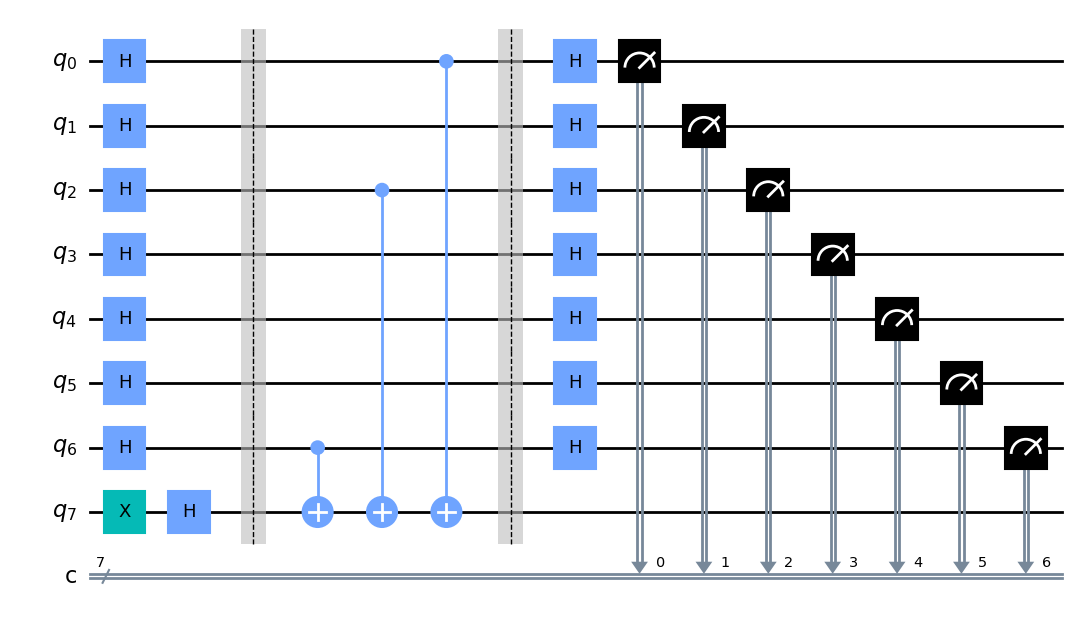

In [3]:
circuit.h([0,1,2,3,4,5,6])
circuit.x(7)
circuit.h(7)

circuit.barrier()
circuit.cx(6,7)
circuit.cx(2,7)
circuit.cx(0,7)
circuit.barrier()
circuit.h([0,1,2,3,4,5,6])
circuit.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])
circuit.draw(output='mpl')

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'1000101': 1}


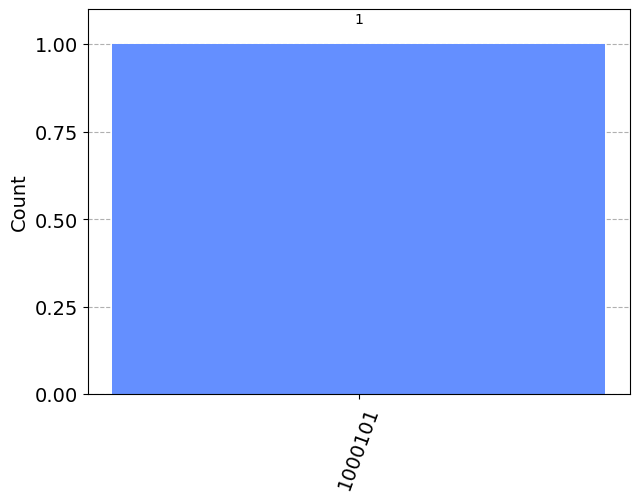

In [9]:
plot_histogram([counts])

## Improved Implementation

index0 is 1
index1 is 0
index2 is 1
index3 is 0
index4 is 0
index5 is 0
index6 is 1


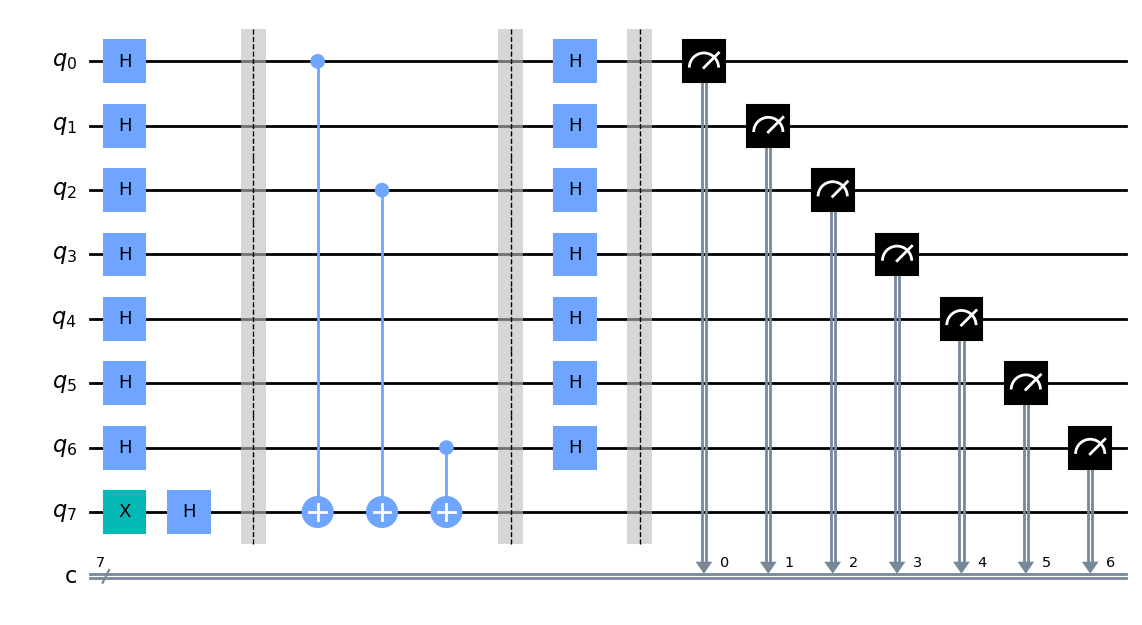

In [6]:
circuit2 = QuantumCircuit(len(secretNumber)+1,len(secretNumber))
circuit2.h(range(len(secretNumber)))
circuit2.x(len(secretNumber))
circuit2.h(len(secretNumber))

circuit2.barrier()

for index, one in enumerate(reversed(secretNumber)):
    print(f"index{index} is {one}")
    if one == "1":
        circuit2.cx(index,len(secretNumber))

circuit2.barrier()

circuit2.h(range(len(secretNumber)))

circuit2.barrier()

circuit2.measure(range(len(secretNumber)),range(len(secretNumber)))
circuit2.draw(output='mpl')

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'1000101': 1}


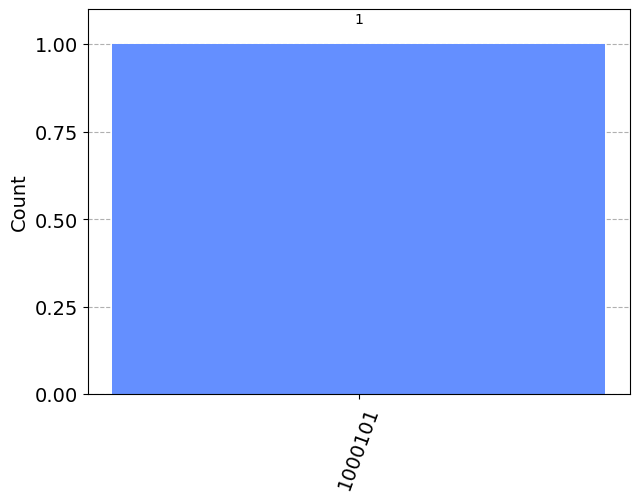

In [8]:
plot_histogram([counts])